# Data Loading and Basic Preprocessing

As mentioned, in the introduction, problem definition and data collection are critical aspects of data science. However, they are difficult to discuss in a generic way, and go beyond the scope of this book. Instead, we will assume you defined the problem, ensured it ammendable to a machine learning solution, and collected relevant data.

One of the most common exchange formats for data is comma separated value (CSV) files, which, for better or worse, have become ubiquous. CSV files (or sometimes TSV files for tab separated values) do not follow a precise standard, and generally are lacking important information, such as meta-data about the types of columns or what they represent. However, they can be read on any system, by any spreadsheet application, or even with a simple text editor.
Another common situation is reading from a database, which might contain more meta-information, for relational databases like SQL, or might have even less structure than a CSV file in the case of non-relational databases (aka no-SQL databases).
In general, you can read your data in any way you like, as long as you can wrangle it into a tabular format within Python.


```{margin} The iris dataset
I was tempted to use the iris dataset, a famous machine learning dataset collected in .. by the father of statistics, Fisher.
Many of the lessons we'll learn below about the breast cancer dataset are also true for the iris dataset, but I didn't want to pick too easy a target.

```

We will be looking at two binary classification datasets, the 'breast cancer' dataset which is included in scikit-learn and was published 1993, and a subset of the lending club dataset, a popular peer-loan community.
It is instructive to compare these two datasets and their characteristics, in particular since the breast cancer dataset is commonly used for educational purposes.

## Loading the 'breast cancer' dataset

First, let me give you a bit of background on the two datasets. The 'breast cancer' dataset contains measurements of breast tissue, obtained by a medical imaging technique. From that, several measurements of the cell nuclei are derived.
The goal is to determine whether a tumor is benign (harmless) or melignant (that is dangerous, in other words cancer). As the data comes with scikit-learn, we can load it directly from the library by importing the ``load_beast_cancer`` function:

In [207]:
from sklearn.datasets import load_breast_cancer
# specifying "as_frame=True" returns the data as a dataframe in addition to a numpy array
cancer = load_breast_cancer(as_frame=True)

```{margin}
If you want more information about the dataset, you can show it by running ``print(cancer.DESCR)`` or by visiting the [documentation](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset).
For brevity, we will not reproduce the description here.
```

Most of the datasets that come with scikit-learn are bundled in so-called 'bunch' objects which contain various information about the dataset. As we specified ``as_frame=True``, the bunch that is returned by ``load_breast_cancer`` will in particular contain a dataframe object, which is what we will be working with:

In [209]:
cancer_df = cancer.frame
cancer_df.shape

(569, 31)

As you can see, the dataset contains 569 rows or samples, and 31 columns. Let's have a closer look at it:

In [210]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


We can see that the first 30 columns are the measurments or features, while the last column is the target.
We can also see that all the features are floating point numbers of various scales, and the target is encoded as an integer.
A dataset of 569 samples is quite small, and while 30 features are potentially hard to visualize, the amount is not overwhelming.

One of the most important pieces of information in a classification task is the prevalence of the classes, which we can easily compute with pandas' ``value_count`` method. We can get the absolute counts by just calling the method, or the frequencies by passing ``normalize=True``:

In [211]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [212]:
cancer_df.target.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

We can see that about 63% of samples belong to class 1, which are the benign samples. It's a good idea to visualize your data before you start to do any learning. We won't go into the details of data visualization, but some aspects that are often useful to investigate are the distribution of individual features, and how they relate to the target variable. There's many ways to visualize distributions, but given that we have 30 features, doing a scatter plot or histogram for all of them might be overly complicated.
Instead, we start with a simple box plot. For some of the plotting and for the later processing it will be convenient to have a dataframe containing only the features, not the target. The easiest way to achieve that is to create a new dataframe with the target dropped:

In [218]:
cancer_features = cancer_df.drop(columns='target')
cancer_features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## Basic exploratory data analysis (EDA) of the 'breast cancer dataset'

The 'cancer_features' dataframe now contains only the features, not the target. By default, the ``drop`` method is not an in-place operation, so the original ``cancer_df`` dataframe still has all the columns.
Now let's do a simple box plot:

In [221]:
import matplotlib.pyplot as plt
plt.boxplot()

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

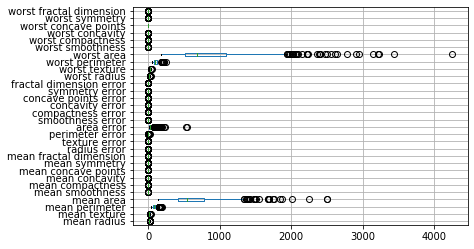

In [223]:
# using vert=False makes the box plot horizontal, which makes it easier to read the column names without tilting your head.
cancer_features.boxplot(vert=False)
# using seaborn this would be
# sns.boxplot(data=cancer_features, orient='h')

From the plot we can see that the features have very different orders of magnitude, with the area related features much larger than all the other features. It's hard to see the distribution of the smaller features, but the area features seems to have a skewed distribution with a tail to the right.

```{margin}
There are more elegant ways to create this plots using seaborn, feel free to give it a go using facetgrid.
I think it's a good idea to know the more general patterns as well, though.
```

A way to visualize how the features relate to the target is by looking at box-plots for each feature when grouping the data by the target.
If the distributions for the two target classes are different for a given feature, this feature is likely to be informative for the classification task.
There's many ways to create such a plot, here is a relatively manual one, using a flexible pattern that I use quite frequently.
I fist create a grid of plots using ``plt.subplots`` and then iterate over the features and create one plot per feature.

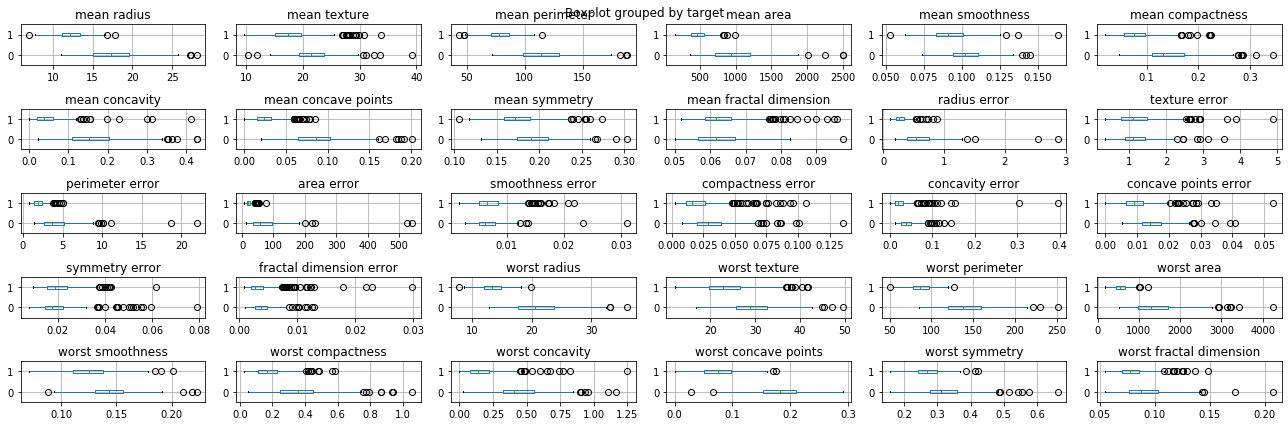

In [256]:
# create a grid of plots, with 5 rows and 6 columns
# and place it on a canvas 18 (virtual) inches whide and 6 inches high
fig, axes = plt.subplots(5, 6, figsize=(18, 6))
# for each column (and with one axis after another)
for c, ax in zip(cancer_features.columns, axes.ravel()):
    # create a box-plot grouped by the target variabel
    cancer_df[[c, 'target']].boxplot(vert=False, by='target', ax=ax)
    # remove the x-axis label
    ax.set_xlabel("")
# remove the figure title
plt.set_suptitle("")
# fit everything nicely on the plot
plt.tight_layout()

Here ``zip`` allows us to iterate over columns in the data (i.e. features) together with the axes in the grid of plots. Using ``.ravel`` on the grid of plots flattens the 5x6 numpy array of axes so we can iterate over them as one flat array of 30 elements.
One of the reasons I used this technique is that now each feature has it's own x-axis, and so we can see all the distributions, even though they are on different scales.
While we will see more automatic and rigorous techniques later, even a quick visual inspection can tell us a lot about the data. We can see that many features are higly informative, such as 'mean radius' and 'worst perimiter', while others are less so, such as 'symmetry error' or 'texture error'. For a more detailed view, we might want to do a scatter plot matrix for some of the more informative features. I select 'mean radius', 'mean perimeter', 'mean area' and 'worst concave points' arbitrarily.

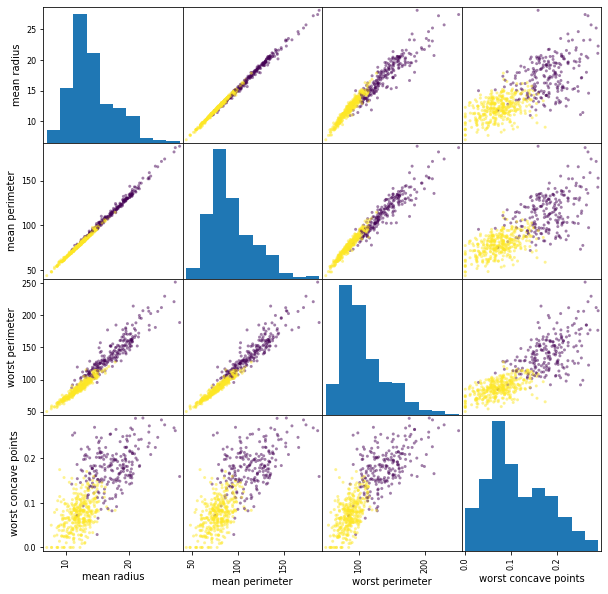

In [273]:
# we're using 'c' to set the color of points according to the class.
# unfortunately it's a bit tricky to get a legend using pandas, it would be easier with seaborn.
# and we set figsize to get a square figure.
# increasing the size in inches actually has the effect of decreasing the text size when rendering it in a jupyter notebook.
pd.plotting.scatter_matrix(
    cancer_features[['mean radius', 'mean perimeter', 'worst perimeter', 'worst concave points']],
    c=cancer_df.target, figsize=(10, 10));

This scatterplot show many interesting aspects of the data. In particular, we can see that mean radius and mean perimeter are highly correlated (as one might expect if the nuclei are approximately round). There's also a pronounced but smaller correlcation between 'perimieter' and 'worst perimiter'. Finally, and maybe most interesting, combining 'worst concave points' with any of the other features (in particular with worst perimeter) seems to result in separating the classes very well. At this point I would be very optimistic in finding a simple model for this data. There are some outliers that do not follow the overall trend of the data, and these might be worth investigating, depending how how acurate a model is sought.

## Loading the 'lending club' dataset

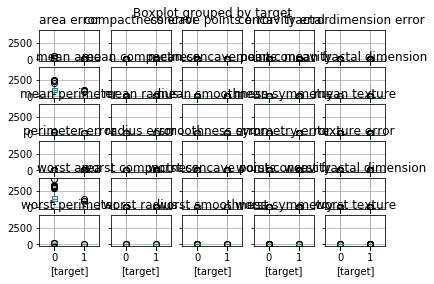

In [240]:
plt.rcParams['figure.constrained_layout.use'] = False
cancer_df.boxplot(by='target');

## Data Scaling



Target looks like classification
Showing only top 10 of 30 continuous features


C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 1 outliers in column worst area.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.955


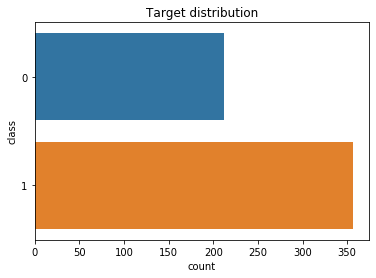

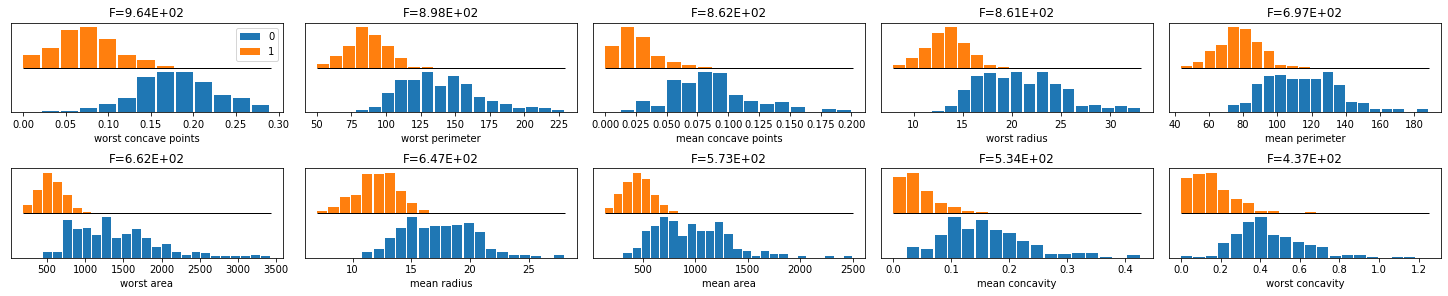

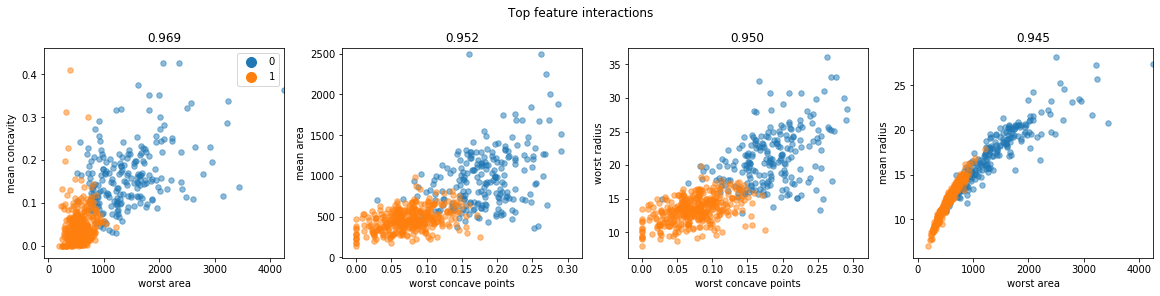

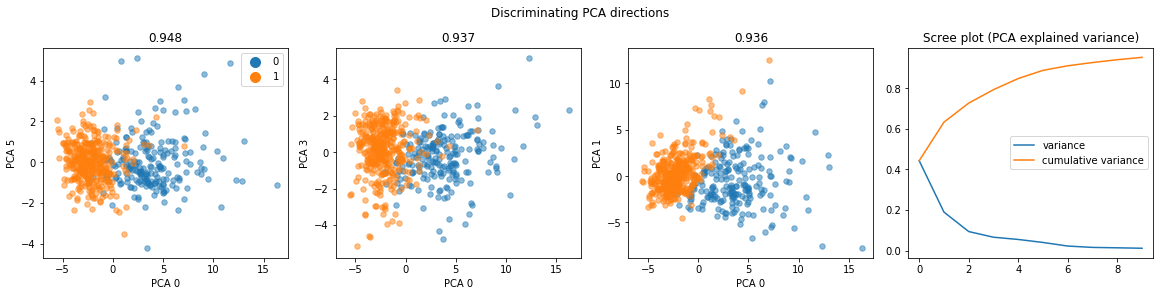

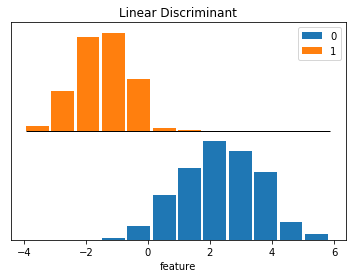

In [204]:
dabl.plot(cancer.frame, target_col='target')

In [83]:
import pandas as pd
loans = pd.read_csv("C:/Users/t3kci/Downloads/loan.csv/loan.csv")

C:\Users\t3kci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
loans.shape

(2260668, 145)

In [88]:
loans.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [89]:
loans_ended = loans[loans.loan_status.isin(['Fully Paid', 'Charged Off'])]

In [90]:
loans_ended.shape

(1303607, 145)

In [91]:
loans_ended.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [92]:
loans_ended.loan_status.value_counts(normalize=True)

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

In [93]:
loans_ended.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [110]:
some_cols = [x for x in loans_ended.columns.tolist() if "settlement" not in x and "last_pymnt" not in x and "hardship" not in x and "total_rec" not in x and 'recover' not in x]
some_cols

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'o

100        D5
152        C4
170        A3
186        B3
215        E5
           ..
2260654    D1
2260655    F4
2260656    F3
2260658    C5
2260664    E4
Name: sub_grade, Length: 1303607, dtype: object

In [142]:
good_cols = ['int_rate', 'dti', 'grade', 'term', 'home_ownership', 'sub_grade', 'annual_inc', 'loan_status', 'application_type', 'tot_coll_amt', 'mort_acc', 'disbursement_method',  'loan_amnt']

In [8]:
data.shape

(208, 16)

In [164]:
sub = loans_ended[::10].copy()

In [178]:
asdf = sub.groupby("loan_status")

In [179]:
asdf.size()

loan_status
Charged Off     26444
Fully Paid     103917
dtype: int64

In [188]:
balanced = asdf.apply(lambda x: x[:26000]).reset_index()

In [189]:
X = balanced[['int_rate', 'annual_inc', 'loan_amnt', 'tot_coll_amt']]
X['tot_coll_amt'].fillna(0, inplace=True)
y = balanced.loan_status

C:\Users\t3kci\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [191]:
X_train.isna().any()

int_rate        False
annual_inc      False
loan_amnt       False
tot_coll_amt    False
dtype: bool

In [192]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10).fit(X_train, y_train)

In [193]:
lr.score(X_train, y_train)

0.5861538461538461

In [194]:
lr.score(X_test, y_test)

0.5881538461538461

In [195]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

In [196]:
rf.score(X_train, y_train)

0.9853846153846154

In [197]:
rf.score(X_test, y_test)

0.6966153846153846

C:\Users\t3kci\anaconda3\lib\site-packages\dabl\preprocessing.py:318: UserWarning: Discarding near-constant features: ['application_type', 'disbursement_method']
  near_constant.index[near_constant].tolist()))
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 19 outliers in column dti.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 10 outliers in column mort_acc.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 43 outliers in column annual_inc.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 70 outliers in column tot_coll_amt.
  int(dropped), series.name), UserWarning)


Target looks like classification
Linear Discriminant Analysis training set score: 0.535


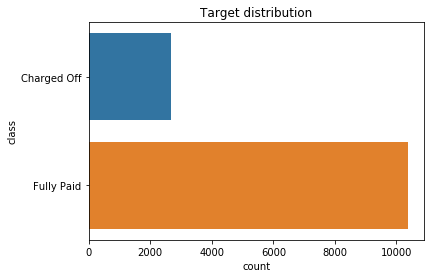

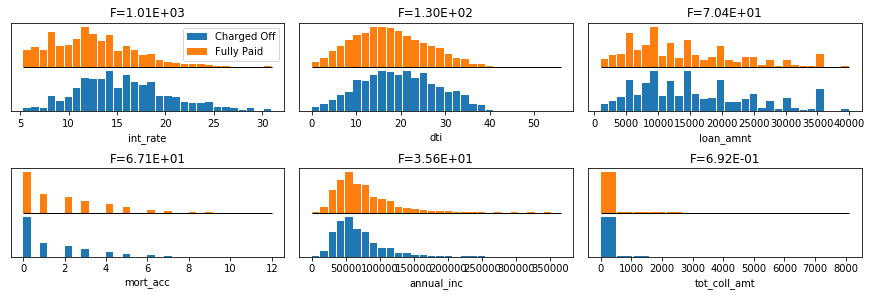

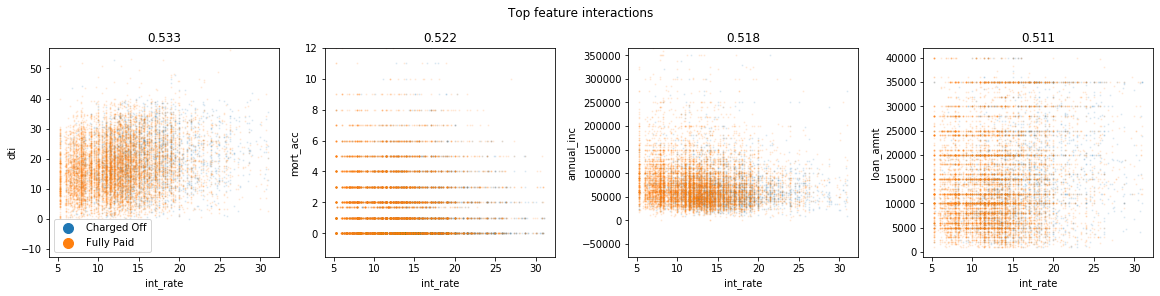

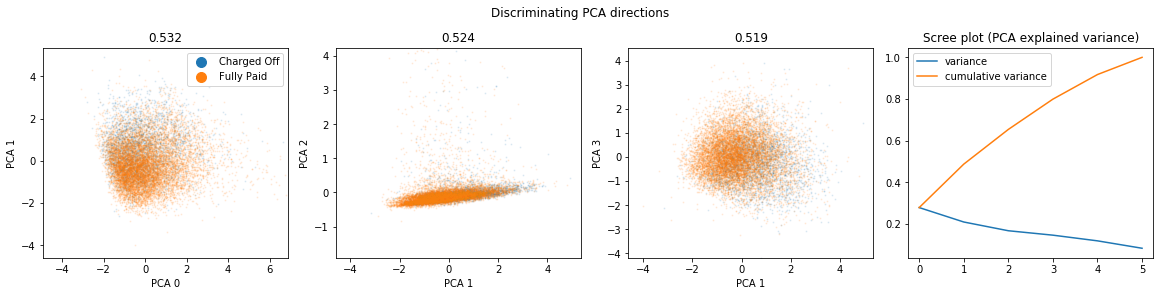

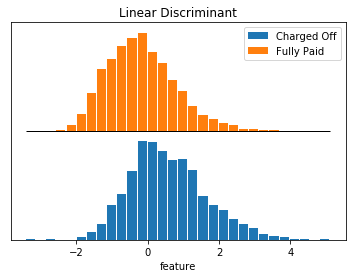

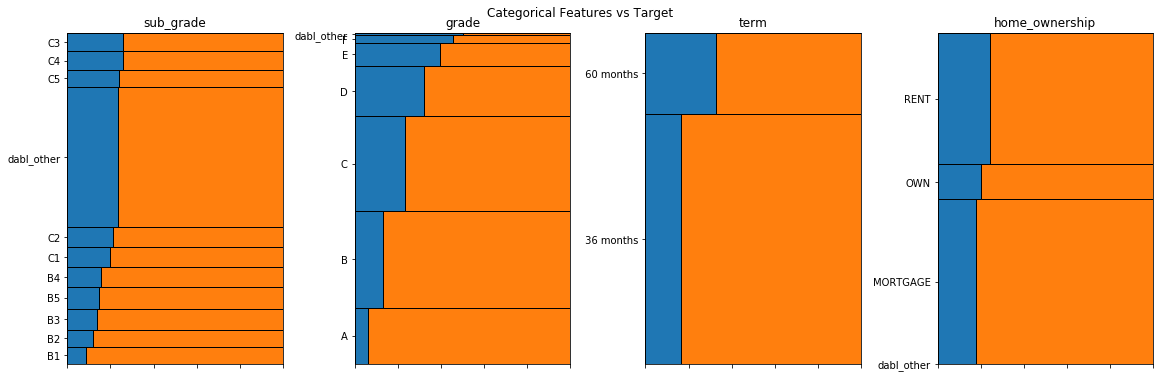

In [145]:
import dabl
dabl.plot(loans_ended[good_cols][::100], target_col='loan_status')

C:\Users\t3kci\anaconda3\lib\site-packages\dabl\preprocessing.py:311: RuntimeWarning: invalid value encountered in longlong_scalars
  if n_values[col] / count > .9:
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\preprocessing.py:318: UserWarning: Discarding near-constant features: ['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'tax_liens', 'sec_app_chargeoff_within_12_mths', 'deferral_term', 'disbursement_method']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 80 continuous features


C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 19 outliers in column dti.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 11 outliers in column acc_open_past_24mths.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 24 outliers in column bc_open_to_buy.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 27 outliers in column avg_cur_bal.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 9 outliers in column total_bc_limit.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 21 outliers in column tot_hi_cred_lim.
  int(dropped), series.name), UserWar

Linear Discriminant Analysis training set score: 0.815


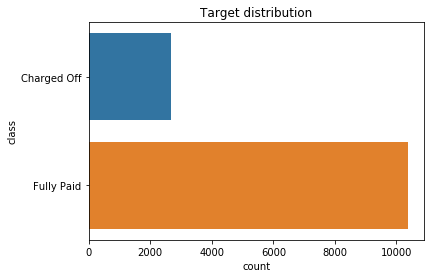

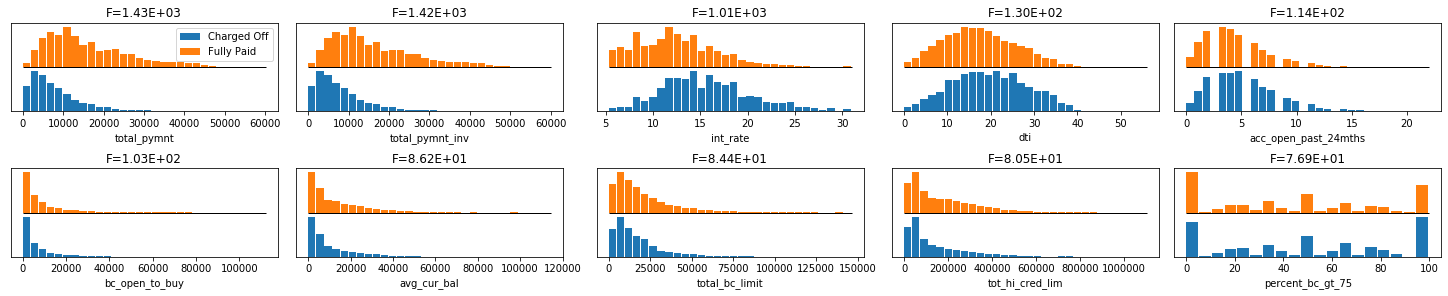

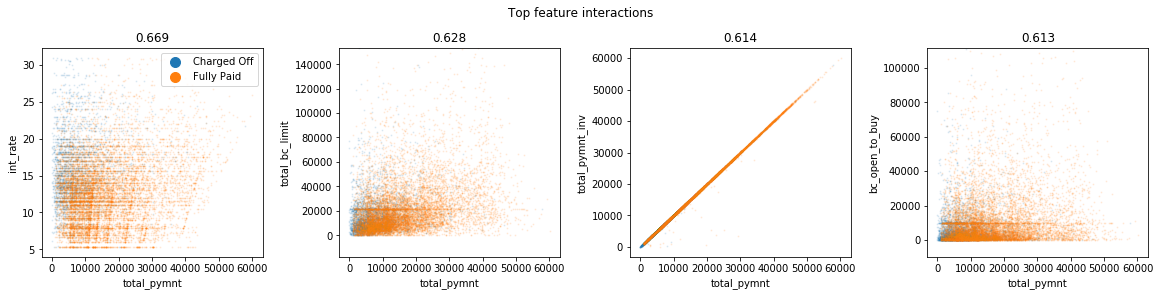

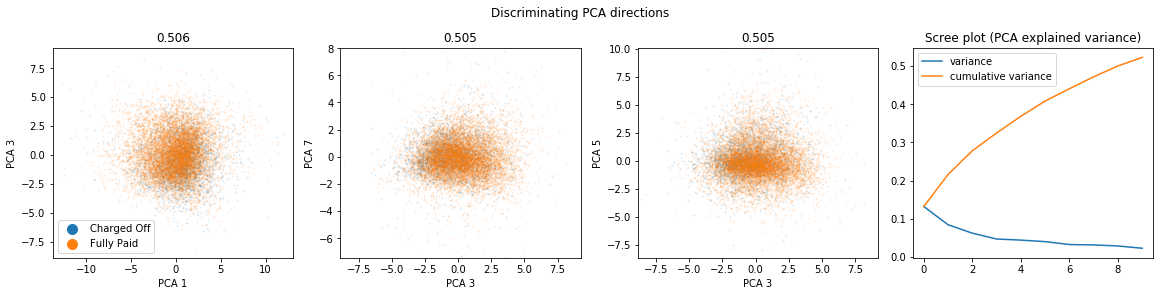

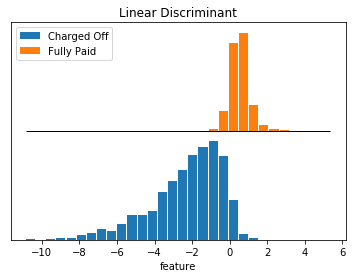

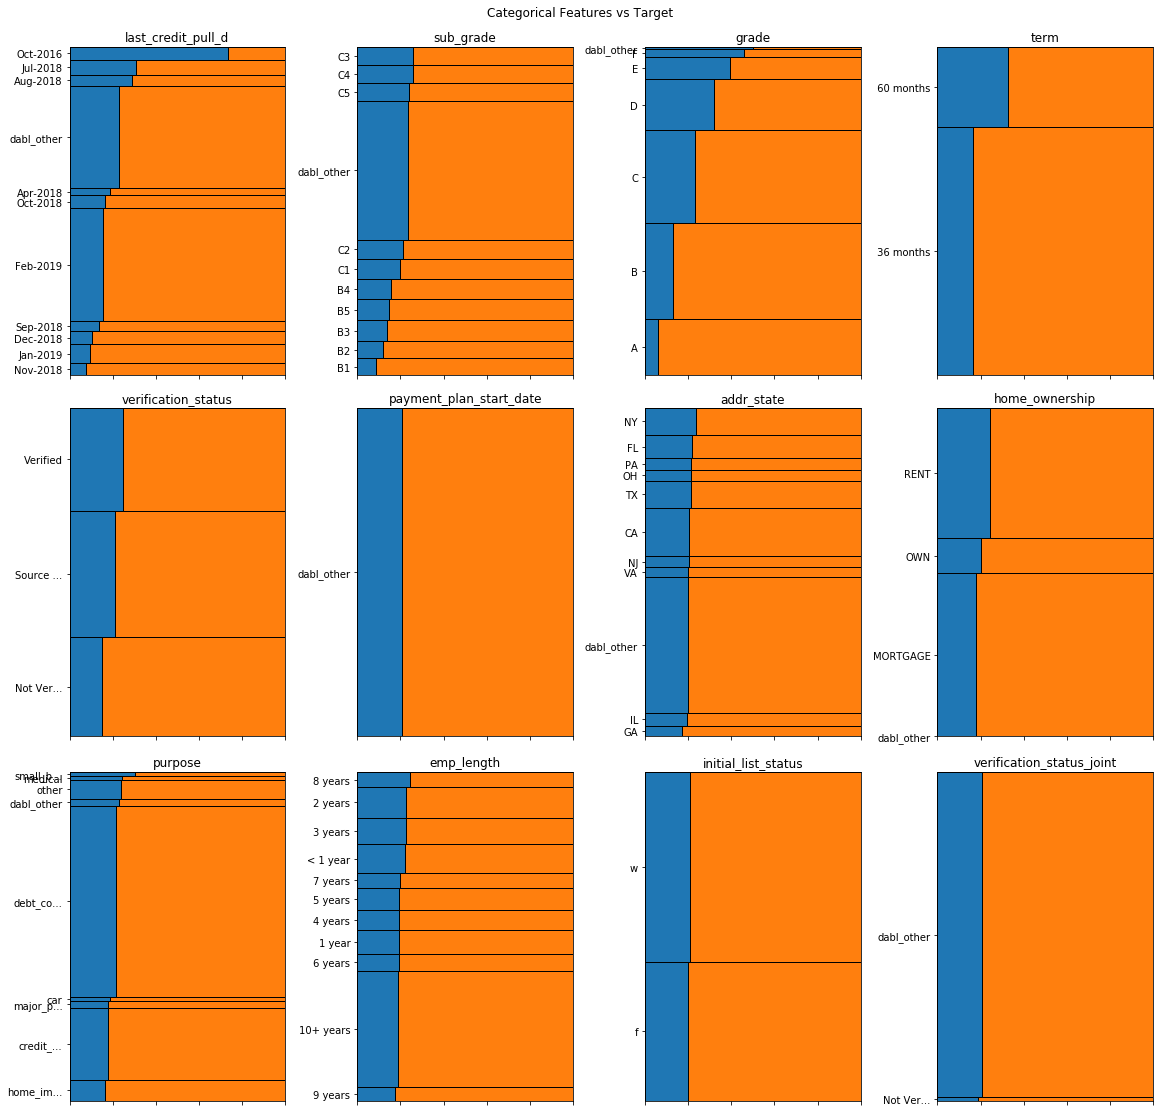

In [141]:
import dabl
dabl.plot(loans_ended[some_cols][::100], target_col='loan_status')

In [7]:
import pandas as pd
data = pd.read_csv("blood-transfusion-service-center.csv")
# show first 5 rows
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


The data consists of five columns, which describe blood donors at a particular transfusion center in Taiwan. Each row corresponds to one donor, and the data is a snapshot taken at March 2007. 

In [6]:
data.Class.value_counts()

1    570
2    178
Name: Class, dtype: int64

In [3]:
blood.data

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01],
       [1.00e+00, 1.60e+01, 4.00e+03, 3.50e+01],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01]])

In [12]:
import pandas as pd
X = data.drop(columns='Class')

In [14]:
y = pd.Series(data.Class)
y.value_counts()

1    570
2    178
Name: Class, dtype: int64

In [24]:
y.value_counts(normalize=True)

1    0.762032
2    0.237968
Name: Class, dtype: float64

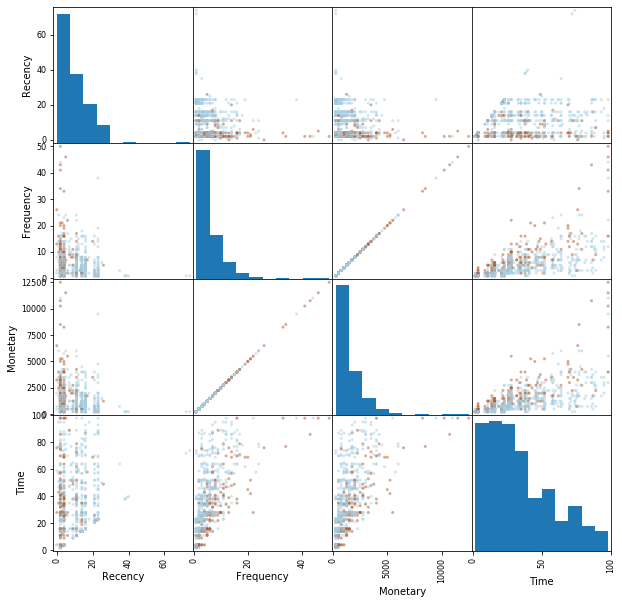

In [17]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(X, c=y, cmap='Paired', figsize=(10, 10));

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data to get going

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
X.shape

(748, 4)

In [20]:
X_train.shape

(561, 4)

In [21]:
X_test.shape

(187, 4)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

In [38]:
knn.score(X_test, y_test)

0.7593582887700535

In [39]:
from sklearn.datasets import fetch_openml

In [68]:
data = fetch_openml("house_sales", as_frame=True)

c:\users\t3kci\checkout\scikit-learn\sklearn\datasets\_openml.py:376: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [69]:
data.frame

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [77]:
X = data.frame.drop(columns='price')
y = data.frame.price

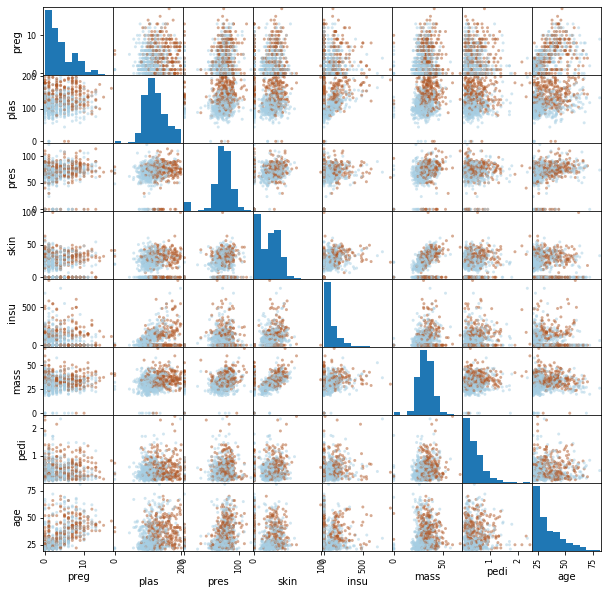

In [65]:
pd.plotting.scatter_matrix(X, c=y.cat.codes, cmap='Paired', figsize=(10, 10));

In [73]:
import dabl

In [75]:
y

C:\Users\t3kci\anaconda3\lib\site-packages\dabl\preprocessing.py:318: UserWarning: Discarding near-constant features: ['waterfront', 'yr_renovated']
  near_constant.index[near_constant].tolist()))


Target looks like regression


C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 25 outliers in column sqft_living.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 1 outliers in column grade.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 20 outliers in column sqft_above.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 8 outliers in column sqft_living15.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 16 outliers in column bathrooms.
  int(dropped), series.name), UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 19 outliers in column sqft_basement.
  int(dropped), series.name), UserWarning)
C:\Users\t3

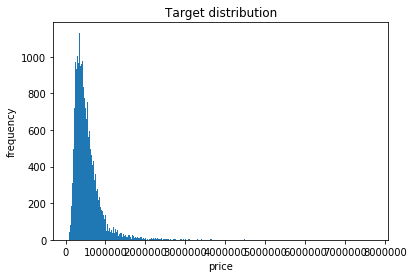

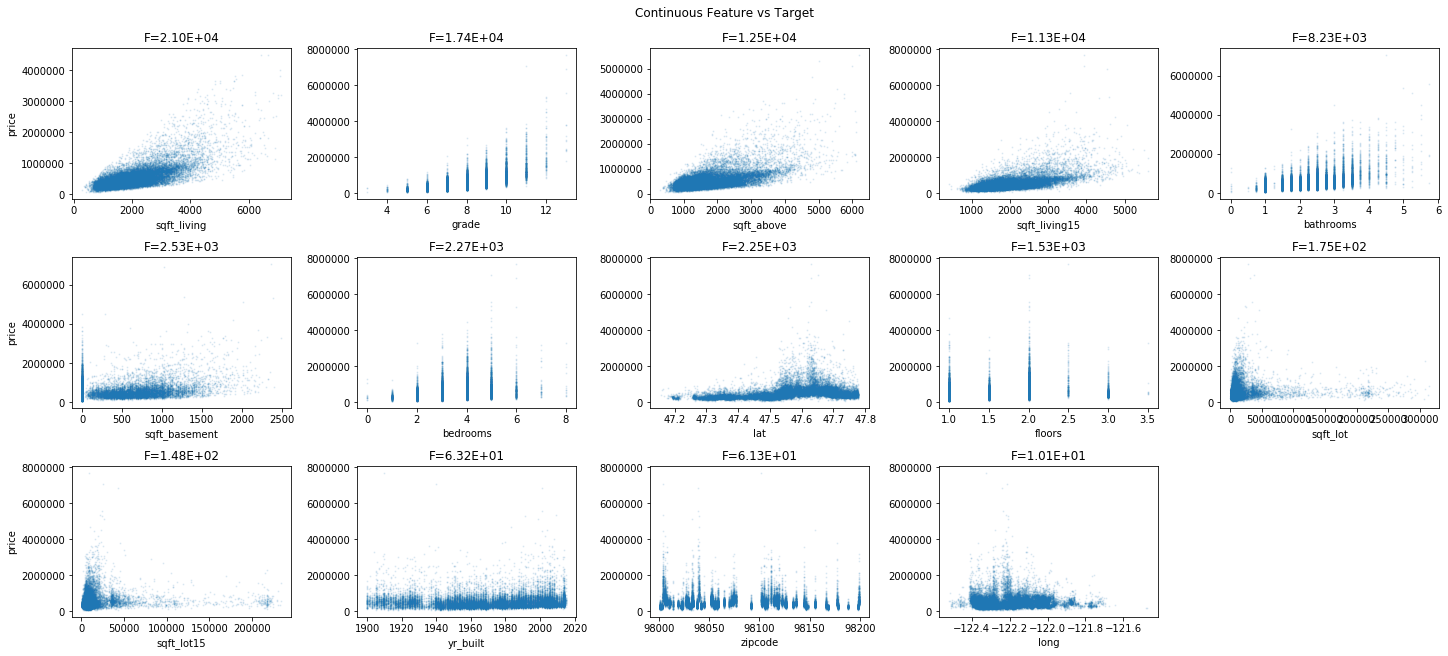

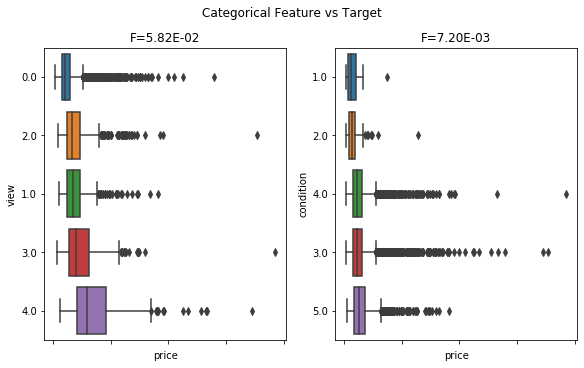

In [78]:
dabl.plot(X, y)